In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_excel("Data for Call and AHT Forecast GSU.xlsx")

In [3]:
df

,Forecast Month,Model Run Month,Contract Expiration Month 1,Contract Expiration Month 2,Enrollments,Escalations,Other,Spanish,Total,Average Handling Time,...,Firm Model Residential Fixed Price (Previous Year),Firm Model Residential Variable Price (Previous Year),Residential Fixed Price as of Model Run Date (Previous Year),Residential Variable Price as of Model Run Date (Previous Year),Actual HDD65,10YN HDD65,Forecasted HDD65 (Source 1),Forecasted HDD65 (Source 2),Forecasted HDD65 (Source 3),Forecasted HDD65 (Source 4)
0,2017-01-01 00:00:00,2016-11-01,2017-02-01,2017-03-01,9131.0,456.0,84566.0,5392.0,99545.0,435.0,...,0.536968,0.992992,0.499,0.959,404.0,674.60,NaN,NaN,NaN,NaN
1,2017-02-01 00:00:00,2016-12-01,2017-03-01,2017-04-01,8639.0,528.0,78274.0,4945.0,92386.0,442.0,...,0.527027,0.990797,0.479,0.989,252.5,521.35,NaN,NaN,NaN,NaN
2,2017-03-01 00:00:00,2017-01-01,2017-04-01,2017-05-01,9374.0,612.0,84834.0,5422.0,100242.0,441.0,...,0.520246,0.960643,0.489,0.999,268.0,300.70,NaN,NaN,NaN,NaN
3,2017-04-01 00:00:00,2017-02-01,2017-05-01,2017-06-01,6005.0,427.0,68185.0,4349.0,78966.0,405.0,...,0.513691,0.947074,0.489,0.989,49.5,111.50,NaN,NaN,NaN,NaN
4,2017-05-01 00:00:00,2017-03-01,2017-06-01,2017-07-01,7245.0,439.0,72970.0,4623.0,85277.0,396.0,...,0.507619,0.963786,0.459,0.939,25.5,21.35,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df['Forecast Month'] = pd.to_datetime(df['Forecast Month'], errors='coerce', format='%Y-%m-%d %H:%M:%S')

In [5]:
df.drop(["NYMEX Settlement Date","Model Run Month","Contract Expiration Month 1","Contract Expiration Month 2","Enrollments","Escalations","Other","Spanish","Forecasted HDD65 (Source 1)","Forecasted HDD65 (Source 2)","Forecasted HDD65 (Source 3)","Forecasted HDD65 (Source 4)"],axis=1,inplace=True)

In [6]:
df1 = df.dropna()

In [7]:
# Check count of Null values

df1.isnull().sum()

Forecast Month                                                     0
Total                                                              0
Average Handling Time                                              0
Current Active Customer Count                                      0
Forecasted Customer Count                                          0
Expiring Guaranteed Bill Customers 1                               0
Expiring Guaranteed Bill Customers 2                               0
Call Center Closures                                               0
NYMEX Price (Forecast)                                             0
NYMEX Price (Actual)                                               0
Firm Model Residential Fixed Price                                 0
Firm Model Residential Variable Price                              0
Residential Fixed Price (Current)                                  0
Residential Variable Price (Current)                               0
Firm Model Residential Fixed Price

In [8]:
df1.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 69
Data columns (total 20 columns):
 #   Column                                                           Non-Null Count  Dtype         
---  ------                                                           --------------  -----         
 0   Forecast Month                                                   70 non-null     datetime64[ns]
 1   Total                                                            70 non-null     float64       
 2   Average Handling Time                                            70 non-null     float64       
 3   Current Active Customer Count                                    70 non-null     float64       
 4   Forecasted Customer Count                                        70 non-null     float64       
 5   Expiring Guaranteed Bill Customers 1                             70 non-null     float64       
 6   Expiring Guaranteed Bill Customers 2                             70 non-null     flo

In [9]:
df1

,Forecast Month,Total,Average Handling Time,Current Active Customer Count,Forecasted Customer Count,Expiring Guaranteed Bill Customers 1,Expiring Guaranteed Bill Customers 2,Call Center Closures,NYMEX Price (Forecast),NYMEX Price (Actual),Firm Model Residential Fixed Price,Firm Model Residential Variable Price,Residential Fixed Price (Current),Residential Variable Price (Current),Firm Model Residential Fixed Price (Previous Year),Firm Model Residential Variable Price (Previous Year),Residential Fixed Price as of Model Run Date (Previous Year),Residential Variable Price as of Model Run Date (Previous Year),Actual HDD65,10YN HDD65
0,2017-01-01,99545.0,435.0,458397.0,461144.356067,3777.0,4605.0,6.0,3.237,2.764,0.531681,1.147572,0.549,1.069,0.536968,0.992992,0.499,0.959,404.0,674.60
1,2017-02-01,92386.0,442.0,465489.0,462642.356067,4605.0,4797.0,4.0,3.346,3.232,0.541255,1.167328,0.619,1.189,0.527027,0.990797,0.479,0.989,252.5,521.35
2,2017-03-01,100242.0,441.0,468321.0,470958.000000,4797.0,4713.0,4.0,3.825,3.930,0.550519,1.140699,0.619,1.189,0.520246,0.960643,0.489,0.999,268.0,300.70
3,2017-04-01,78966.0,405.0,468742.0,469163.000000,4713.0,3674.0,5.0,3.380,3.391,0.558495,1.134969,0.599,1.139,0.513691,0.947074,0.489,0.989,49.5,111.50
4,2017-05-01,85277.0,396.0,467616.0,464658.000000,3674.0,2933.0,5.0,2.868,2.627,0.564534,1.164457,0.579,1.089,0.507619,0.963786,0.459,0.939,25.5,21.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2022-06-01,62562.0,602.0,479283.0,472490.268950,6294.0,7230.0,4.0,5.381,5.336,0.698473,2.249050,0.829,1.999,0.556006,1.660583,0.559,1.629,0.0,0.00
66,2022-07-01,55583.0,603.0,475477.0,468921.000000,7230.0,8780.0,6.0,7.436,7.267,0.722044,2.287182,0.999,2.199,0.558477,1.688130,0.579,1.679,0.0,0.00
67,2022-08-01,62914.0,619.0,470438.0,468001.000000,8780.0,8125.0,4.0,8.880,8.908,0.745118,2.317635,1.129,2.389,0.564234,1.736266,0.589,1.679,0.0,0.15
68,2022-09-01,62727.0,715.0,465435.0,466769.000000,8125.0,7279.0,5.0,6.557,6.551,0.770715,2.560349,0.949,2.159,0.571862,1.784155,0.629,1.749,0.0,2.95


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [11]:
import pandas as pd

# Convert the File column into a Pandas datetime object
df1['Forecast Month'] = pd.to_datetime(df1['Forecast Month'])

# Extract year, month, day, hour, minute, and second as separate columns
df1['year'] = df1['Forecast Month'].dt.year
df1['month'] = df1['Forecast Month'].dt.month

# Drop the original File column
df1.drop('Forecast Month', axis=1, inplace=True)

/var/folders/f6/sz00vf050x39_cpws85xnc7m0000gn/T/ipykernel_25886/1939006101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Forecast Month'] = pd.to_datetime(df1['Forecast Month'])
/var/folders/f6/sz00vf050x39_cpws85xnc7m0000gn/T/ipykernel_25886/1939006101.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['year'] = df1['Forecast Month'].dt.year
/var/folders/f6/sz00vf050x39_cpws85xnc7m0000gn/T/ipykernel_25886/1939006101.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [12]:
df1.head()

,Total,Average Handling Time,Current Active Customer Count,Forecasted Customer Count,Expiring Guaranteed Bill Customers 1,Expiring Guaranteed Bill Customers 2,Call Center Closures,NYMEX Price (Forecast),NYMEX Price (Actual),Firm Model Residential Fixed Price,...,Residential Fixed Price (Current),Residential Variable Price (Current),Firm Model Residential Fixed Price (Previous Year),Firm Model Residential Variable Price (Previous Year),Residential Fixed Price as of Model Run Date (Previous Year),Residential Variable Price as of Model Run Date (Previous Year),Actual HDD65,10YN HDD65,year,month
0,99545.0,435.0,458397.0,461144.356067,3777.0,4605.0,6.0,3.237,2.764,0.531681,...,0.549,1.069,0.536968,0.992992,0.499,0.959,404.0,674.60,2017,1
1,92386.0,442.0,465489.0,462642.356067,4605.0,4797.0,4.0,3.346,3.232,0.541255,...,0.619,1.189,0.527027,0.990797,0.479,0.989,252.5,521.35,2017,2
2,100242.0,441.0,468321.0,470958.000000,4797.0,4713.0,4.0,3.825,3.930,0.550519,...,0.619,1.189,0.520246,0.960643,0.489,0.999,268.0,300.70,2017,3
3,78966.0,405.0,468742.0,469163.000000,4713.0,3674.0,5.0,3.380,3.391,0.558495,...,0.599,1.139,0.513691,0.947074,0.489,0.989,49.5,111.50,2017,4
4,85277.0,396.0,467616.0,464658.000000,3674.0,2933.0,5.0,2.868,2.627,0.564534,...,0.579,1.089,0.507619,0.963786,0.459,0.939,25.5,21.35,2017,5


In [13]:
# extract the target label column 'Total Actual'
y = df1['Total']

# drop the target label column from the dataframe
X = df1.drop(['Total'], axis=1)


In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fit the linear regression model
base_model = LinearRegression()
base_model.fit(X_train, y_train)

# Predict the dependent variable using the model
y_pred = base_model.predict(X_test)

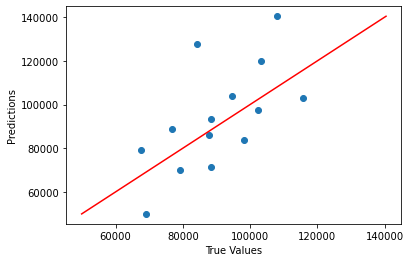

In [15]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color="red")

plt.show()

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 14963.717033090335
Mean Squared Error: 338435926.89112526
Root Mean Squared Error: 18396.628139176082
R-squared: -0.7815685020030363


In [17]:
# extract the target label column 'Average Handling Time'
y1 = df1['Average Handling Time']

# drop the target label column from the dataframe
X1 = df1.drop(['Average Handling Time'], axis=1)

In [18]:
# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

# Fit the linear regression model
base_model = LinearRegression()
base_model.fit(X1_train, y1_train)

# Predict the dependent variable using the model
y1_pred = base_model.predict(X1_test)

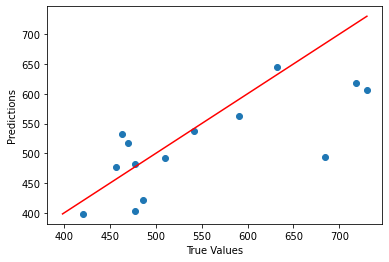

In [19]:
plt.scatter(y1_test, y1_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

min_val = min(min(y1_test), min(y1_pred))
max_val = max(max(y1_test), max(y1_pred))
plt.plot([min_val, max_val], [min_val, max_val], color="red")

plt.show()

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

mae = mean_absolute_error(y1_test, y1_pred)
mse = mean_squared_error(y1_test, y1_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y1_test, y1_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 55.927652693640475
Mean Squared Error: 5745.739786086175
Root Mean Squared Error: 75.80065821670796
R-squared: 0.4356488395548742


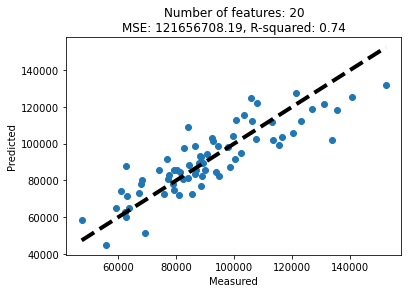

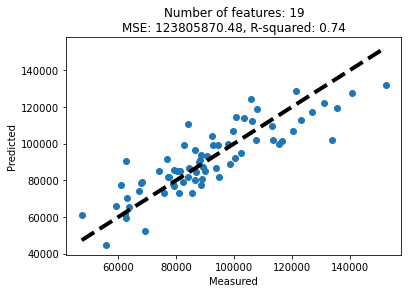

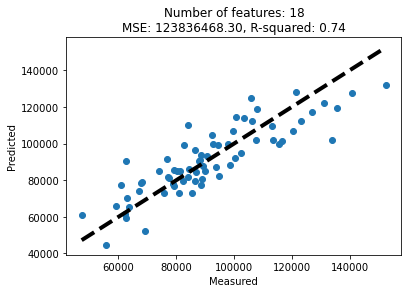

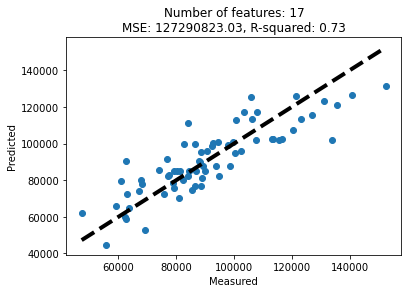

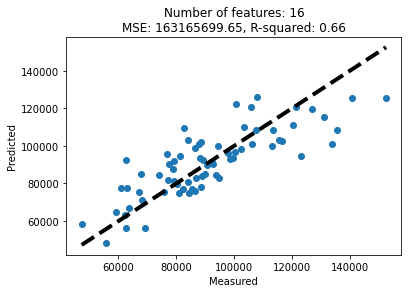

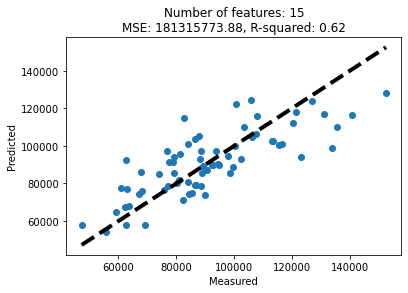

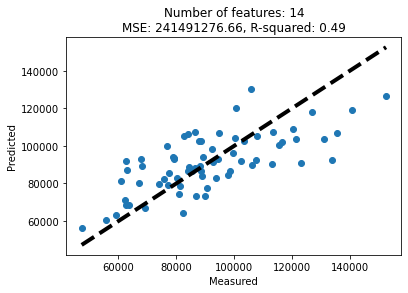

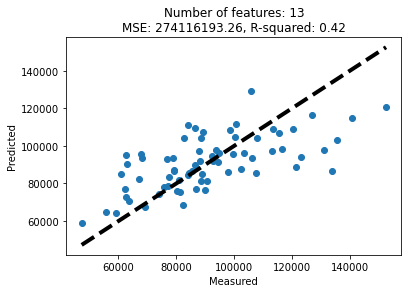

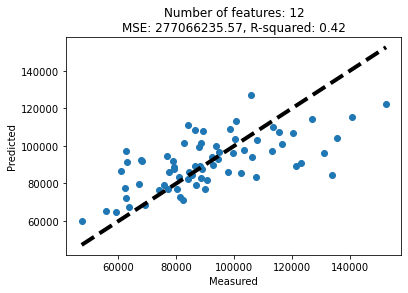

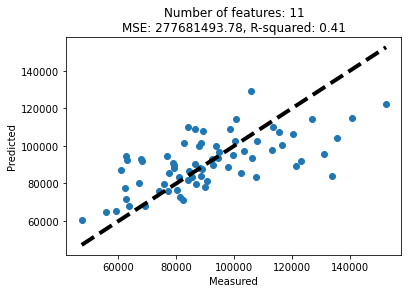

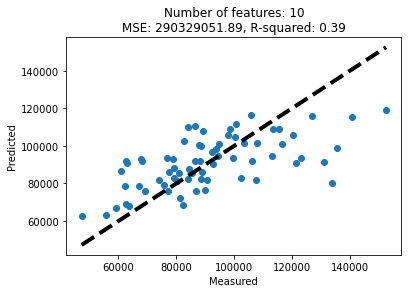

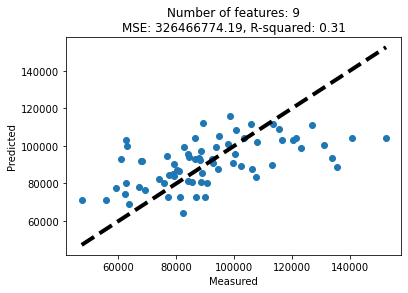

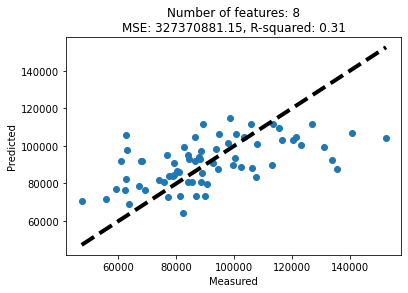

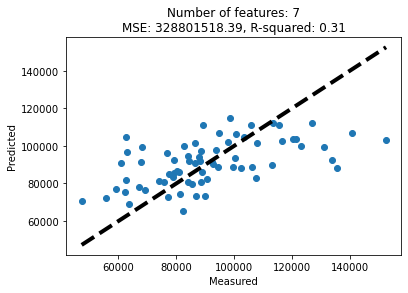

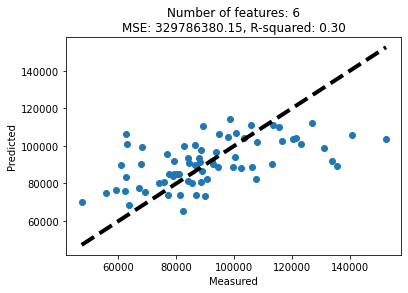

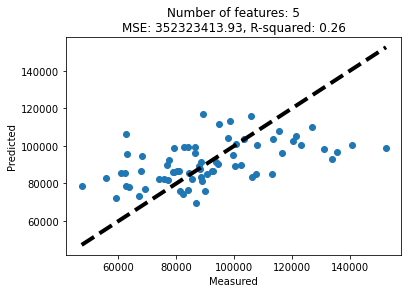

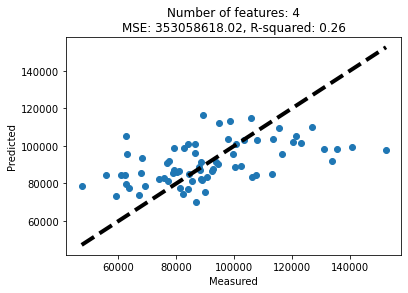

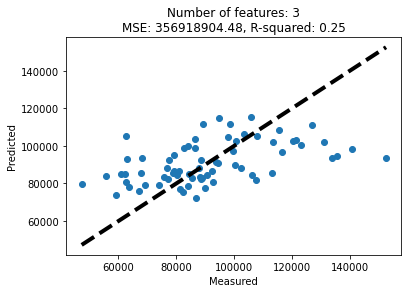

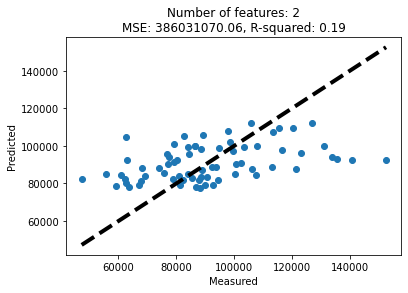

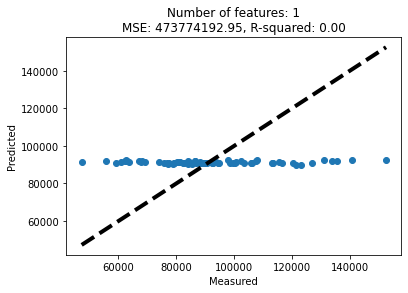

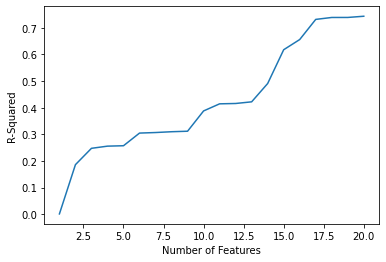

In [21]:
#BACKWARD

from sklearn.feature_selection import RFE

# create linear regression object
lr = LinearRegression()

# create RFE object and set number of features to remove at each iteration
rfe = RFE(lr, n_features_to_select=21, step=1)

# fit RFE and get selected features
rfe.fit(X, y)
selected_features = X.columns[rfe.support_].tolist()

# create list to store r-squared values for each iteration
r_squared_values = []

# loop through the number of remaining features and fit linear regression
for i in range(len(selected_features), 0, -1):
    X_i = X[selected_features[:i]]
    lr.fit(X_i, y)
    y_pred = lr.predict(X_i)
    mse = mean_squared_error(y, y_pred)
    r_squared = lr.score(X_i, y)
    
    # plot the prediction
    plt.scatter(y, y_pred)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    plt.xlabel('Measured')
    plt.ylabel('Predicted')
    plt.title(f"Number of features: {i}\nMSE: {mse:.2f}, R-squared: {r_squared:.2f}")
    plt.show()
    
    r_squared_values.append(r_squared)

# reverse the order of r-squared values
r_squared_values.reverse()

# plot the r-squared values against the number of features
import matplotlib.pyplot as plt
plt.plot(range(1, len(r_squared_values) + 1), r_squared_values)
plt.xlabel("Number of Features")
plt.ylabel("R-Squared")
plt.show()


In [22]:
#STEPWISE

import statsmodels.api as sm
def forward_stepwise_selection(X, y, significance_level=0.05):
    """
    Forward stepwise feature selection using linear regression.

    Parameters:
    X (pandas.DataFrame): The independent variables.
    y (pandas.Series): The dependent variable.
    significance_level (float): The significance level used for feature selection.

    Returns:
    selected_features (list): The list of selected features.
    """
    # initialize selected features and remaining features
    selected_features = []
    remaining_features = list(X.columns)

    while len(remaining_features) > 0:
        # initialize best p-value and best feature
        best_pvalue = 1
        best_feature = None

        # loop over remaining features and fit a linear regression model with each feature added
        for feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[selected_features + [feature]])).fit()
            pvalue = model.pvalues[feature]

            # if p-value is better than the best so far, update the best p-value and best feature
            if pvalue < best_pvalue:
                best_pvalue = pvalue
                best_feature = feature

        # if the best p-value is less than the significance level, add the best feature to the selected features
        if best_pvalue < significance_level:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            # if no more features are significant at the given level, exit the loop
            break

    return selected_features

In [23]:
forward_stepwise_selection(X, y, significance_level=0.05)

['Actual HDD65']

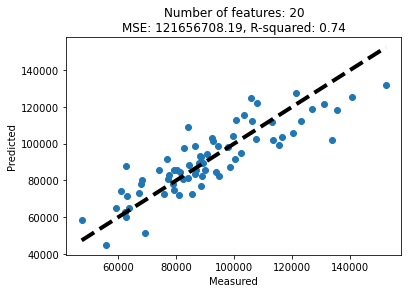

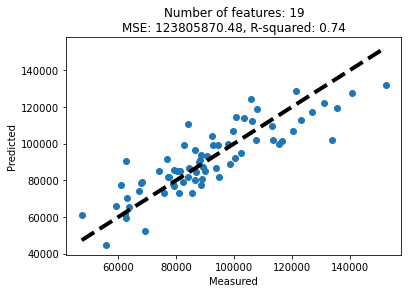

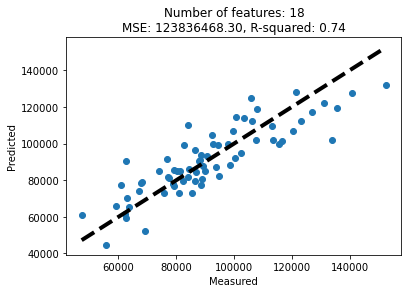

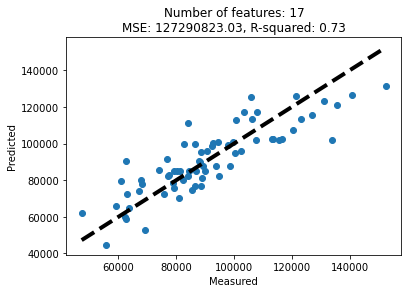

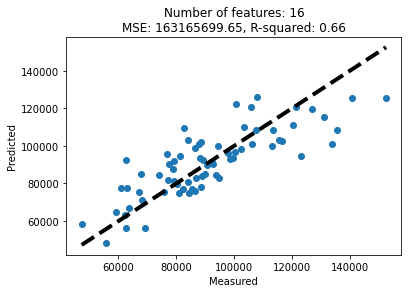

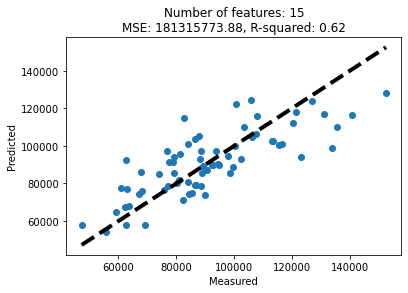

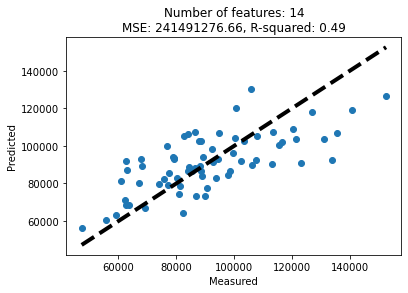

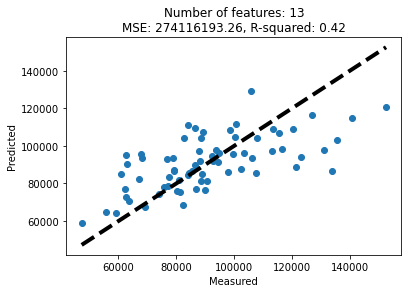

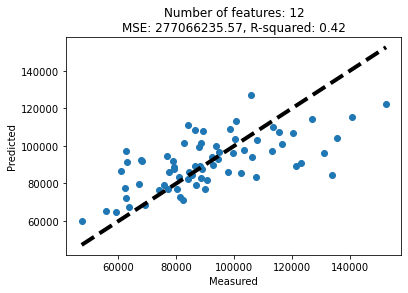

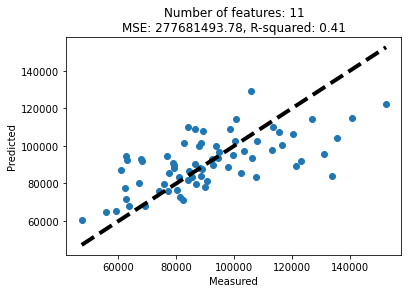

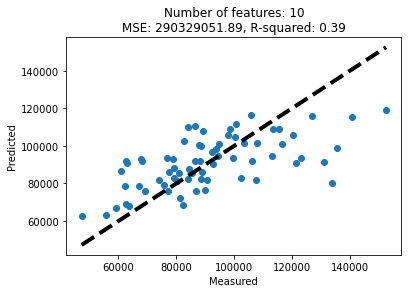

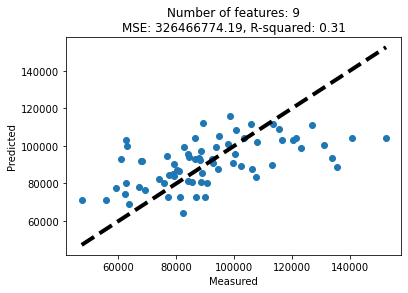

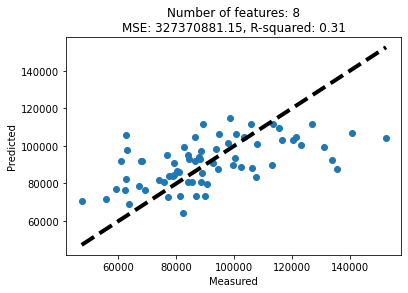

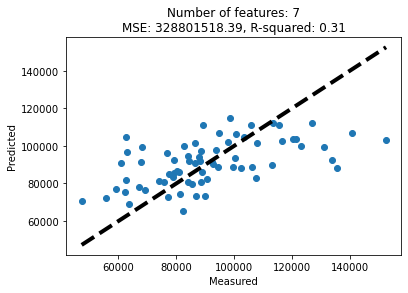

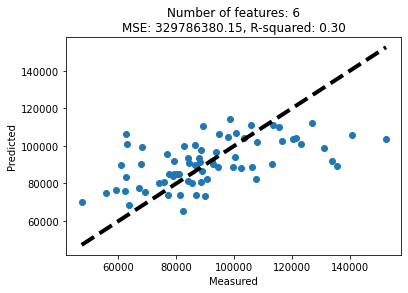

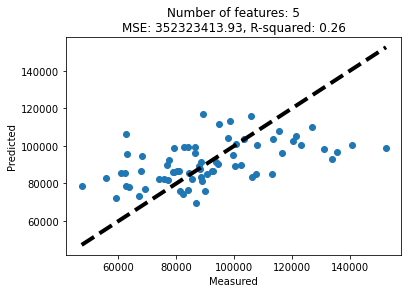

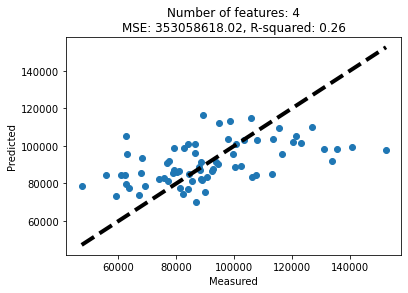

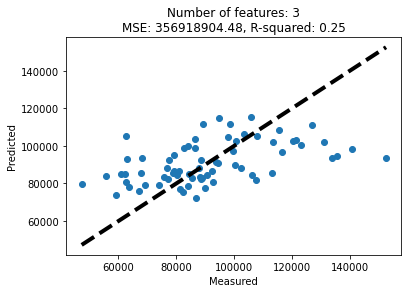

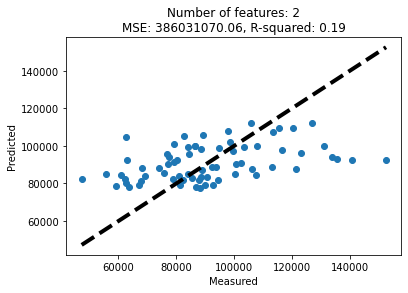

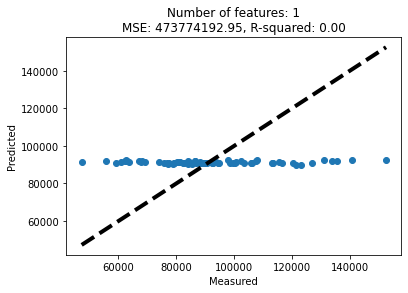

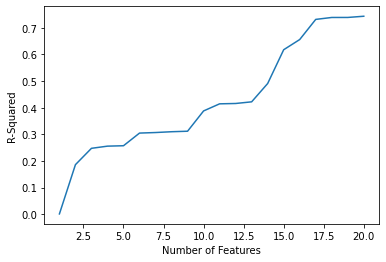

In [24]:
#BACKWARD 2

from sklearn.feature_selection import RFE

# create linear regression object
lr = LinearRegression()

# create RFE object and set number of features to remove at each iteration
rfe = RFE(lr, n_features_to_select=21, step=1)

# fit RFE and get selected features
rfe.fit(X1, y1)
selected_features = X.columns[rfe.support_].tolist()

# create list to store r-squared values for each iteration
r_squared_values = []

# loop through the number of remaining features and fit linear regression
for i in range(len(selected_features), 0, -1):
    X_i = X[selected_features[:i]]
    lr.fit(X_i, y)
    y_pred = lr.predict(X_i)
    mse = mean_squared_error(y, y_pred)
    r_squared = lr.score(X_i, y)
    
    # plot the prediction
    plt.scatter(y, y_pred)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    plt.xlabel('Measured')
    plt.ylabel('Predicted')
    plt.title(f"Number of features: {i}\nMSE: {mse:.2f}, R-squared: {r_squared:.2f}")
    plt.show()
    
    r_squared_values.append(r_squared)

# reverse the order of r-squared values
r_squared_values.reverse()

# plot the r-squared values against the number of features
import matplotlib.pyplot as plt
plt.plot(range(1, len(r_squared_values) + 1), r_squared_values)
plt.xlabel("Number of Features")
plt.ylabel("R-Squared")
plt.show()



In [25]:
import statsmodels.api as sm
def forward_stepwise_selection(X, y, significance_level=0.05):
    """
    Forward stepwise feature selection using linear regression.

    Parameters:
    X (pandas.DataFrame): The independent variables.
    y (pandas.Series): The dependent variable.
    significance_level (float): The significance level used for feature selection.

    Returns:
    selected_features (list): The list of selected features.
    """
    # initialize selected features and remaining features
    selected_features = []
    remaining_features = list(X1.columns)

    while len(remaining_features) > 0:
        # initialize best p-value and best feature
        best_pvalue = 1
        best_feature = None

        # loop over remaining features and fit a linear regression model with each feature added
        for feature in remaining_features:
            model = sm.OLS(y1, sm.add_constant(X1[selected_features + [feature]])).fit()
            pvalue = model.pvalues[feature]

            # if p-value is better than the best so far, update the best p-value and best feature
            if pvalue < best_pvalue:
                best_pvalue = pvalue
                best_feature = feature

        # if the best p-value is less than the significance level, add the best feature to the selected features
        if best_pvalue < significance_level:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            # if no more features are significant at the given level, exit the loop
            break

    return selected_features

In [26]:
forward_stepwise_selection(X1, y1, significance_level=0.05)

['year',
 'month',
 'Total',
 'Current Active Customer Count',
 'NYMEX Price (Actual)']